# Physics-Informed Neural Networks for Seismic Wave Equation
## Theory and Mathematical Background

## 1. Introduction to Seismic Waves

### What are Seismic Waves?

Seismic waves are elastic waves that propagate through the Earth's interior and along its surface. They are generated by earthquakes, volcanic eruptions, explosions, and other sources of energy release. Understanding seismic wave propagation is fundamental to:

- **Earthquake seismology**: Locating earthquake epicenters, determining magnitudes, and understanding fault mechanics
- **Oil and gas exploration**: Mapping subsurface geological structures to identify potential hydrocarbon reservoirs
- **Subsurface imaging**: Creating detailed images of the Earth's interior (seismic tomography)
- **Engineering applications**: Assessing seismic hazard for structural design
- **Geothermal energy**: Identifying subsurface heat sources and fluid pathways

### Traditional Numerical Methods vs Neural Network Approach

| Aspect | Traditional Methods (FDM/FEM) | Physics-Informed Neural Networks |
|--------|-------------------------------|----------------------------------|
| Mesh requirement | Requires structured/unstructured mesh | Mesh-free |
| Dimensionality | Suffers from curse of dimensionality | Handles high-dimensional problems |
| Inverse problems | Requires separate adjoint solver | Naturally handles inverse problems |
| Data integration | Difficult to incorporate sparse data | Easy data assimilation |
| Computational cost | Scales with mesh resolution | Fixed network size |
| Accuracy | Well-established error bounds | Active area of research |

## 2. Wave Equation Derivation

### 1D Wave Equation

The one-dimensional wave equation describes the propagation of waves along a single spatial dimension:

$$\frac{\partial^2 u}{\partial t^2} = c^2 \frac{\partial^2 u}{\partial x^2}$$

### 2D Wave Equation

In two spatial dimensions, the wave equation becomes:

$$\frac{\partial^2 u}{\partial t^2} = c^2 \left(\frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2}\right) = c^2 \nabla^2 u$$

### Physical Meaning of Variables

- **$u(x, t)$** or **$u(x, y, t)$**: The **displacement field** — represents the displacement of the medium from its equilibrium position at point $x$ (or $(x, y)$) and time $t$

- **$c$**: The **wave propagation speed** — determined by the material properties of the medium:

$$c = \sqrt{\frac{E}{\rho}}$$

where:
  - $E$ is the elastic modulus (stiffness) of the medium
  - $\rho$ is the density of the medium

For seismic P-waves (pressure waves) in an elastic medium:

$$c_P = \sqrt{\frac{\lambda + 2\mu}{\rho}}$$

where $\lambda$ and $\mu$ are the Lam\'{e} parameters.

For seismic S-waves (shear waves):

$$c_S = \sqrt{\frac{\mu}{\rho}}$$

### Derivation from Newton's Second Law

Consider a small element of an elastic string with mass density $\rho$ and tension $T$:

1. **Net force** on the element: $F = T \sin(\theta_2) - T \sin(\theta_1) \approx T \left(\frac{\partial u}{\partial x}\bigg|_{x+dx} - \frac{\partial u}{\partial x}\bigg|_x\right) = T \frac{\partial^2 u}{\partial x^2} dx$

2. **Mass** of element: $m = \rho \, dx$

3. **Newton's second law**: $F = ma \Rightarrow T \frac{\partial^2 u}{\partial x^2} dx = \rho \, dx \frac{\partial^2 u}{\partial t^2}$

4. **Result**: $\frac{\partial^2 u}{\partial t^2} = \frac{T}{\rho} \frac{\partial^2 u}{\partial x^2} = c^2 \frac{\partial^2 u}{\partial x^2}$

## 3. PINN Formulation

### Neural Network as Universal Function Approximator

The key idea of PINNs is to represent the solution $u(x, t)$ as a neural network:

$$u(x, t) \approx u_\theta(x, t) = \mathcal{N}_\theta(x, t)$$

where $\theta$ represents the network parameters (weights and biases), and $\mathcal{N}_\theta$ is a feedforward neural network.

### Automatic Differentiation

Since neural networks are composed of differentiable operations, we can compute **exact derivatives** using automatic differentiation (autograd):

$$\frac{\partial u_\theta}{\partial t}, \quad \frac{\partial^2 u_\theta}{\partial t^2}, \quad \frac{\partial u_\theta}{\partial x}, \quad \frac{\partial^2 u_\theta}{\partial x^2}$$

These derivatives are computed through the computational graph — no finite differences or numerical approximations needed!

### Physics-Informed Loss Function

The total loss function combines physics constraints with boundary/initial conditions:

$$\mathcal{L}_{total} = \mathcal{L}_{physics} + \lambda_{BC} \cdot \mathcal{L}_{boundary} + \lambda_{IC} \cdot \mathcal{L}_{initial}$$

where:

**PDE Residual Loss** (enforces the wave equation):
$$\mathcal{L}_{physics} = \frac{1}{N_r} \sum_{i=1}^{N_r} \left| \frac{\partial^2 u_\theta}{\partial t^2}(x_i, t_i) - c^2 \frac{\partial^2 u_\theta}{\partial x^2}(x_i, t_i) \right|^2$$

**Boundary Condition Loss:**
$$\mathcal{L}_{boundary} = \frac{1}{N_b} \sum_{i=1}^{N_b} \left| u_\theta(x_{bc}^i, t_i) - u_{bc}(x_{bc}^i, t_i) \right|^2$$

**Initial Condition Loss:**
$$\mathcal{L}_{initial} = \frac{1}{N_0} \sum_{i=1}^{N_0} \left[ \left| u_\theta(x_i, 0) - u_0(x_i) \right|^2 + \left| \frac{\partial u_\theta}{\partial t}(x_i, 0) - v_0(x_i) \right|^2 \right]$$

The weighting parameters $\lambda_{BC}$ and $\lambda_{IC}$ control the relative importance of each loss term.

## 4. Forward vs Inverse Problem

### Forward Problem

**Given:** Wave speed $c$, initial conditions $u_0(x)$, $v_0(x)$, boundary conditions

**Find:** The displacement field $u(x, t)$ for all $x$ and $t$

$$\text{Known } c \xrightarrow{\text{PINN}} u(x, t)$$

### Inverse Problem

**Given:** Sparse observations of $u(x, t)$ at certain locations

**Find:** The unknown wave speed $c$ (and optionally the full field $u$)

$$\text{Observed } u_{obs} \xrightarrow{\text{PINN}} c$$

### Why Inverse Problems Matter in Geophysics

In practice, we can measure seismic waves at the surface using geophones/seismometers, but we **cannot directly measure** the subsurface wave speed. The wave speed depends on rock type, porosity, fluid content, temperature, and pressure — all properties of great interest for:

1. **Oil exploration**: Different rock formations and fluid-filled reservoirs have different wave speeds
2. **Earthquake hazard**: Understanding fault zone properties requires knowing subsurface velocities
3. **Carbon sequestration monitoring**: Changes in wave speed indicate CO$_2$ migration in the subsurface
4. **Geothermal exploration**: Temperature variations affect wave speed

The PINN approach to inverse problems is elegant: simply make $c$ a **learnable parameter** and add a data-fitting loss term:

$$\mathcal{L}_{total} = \mathcal{L}_{physics}(c) + \lambda_{data} \cdot \mathcal{L}_{data}$$

$$\mathcal{L}_{data} = \frac{1}{N_d} \sum_{i=1}^{N_d} \left| u_\theta(x_i^{obs}, t_i^{obs}) - u_i^{obs} \right|^2$$

## 5. Conceptual Diagrams

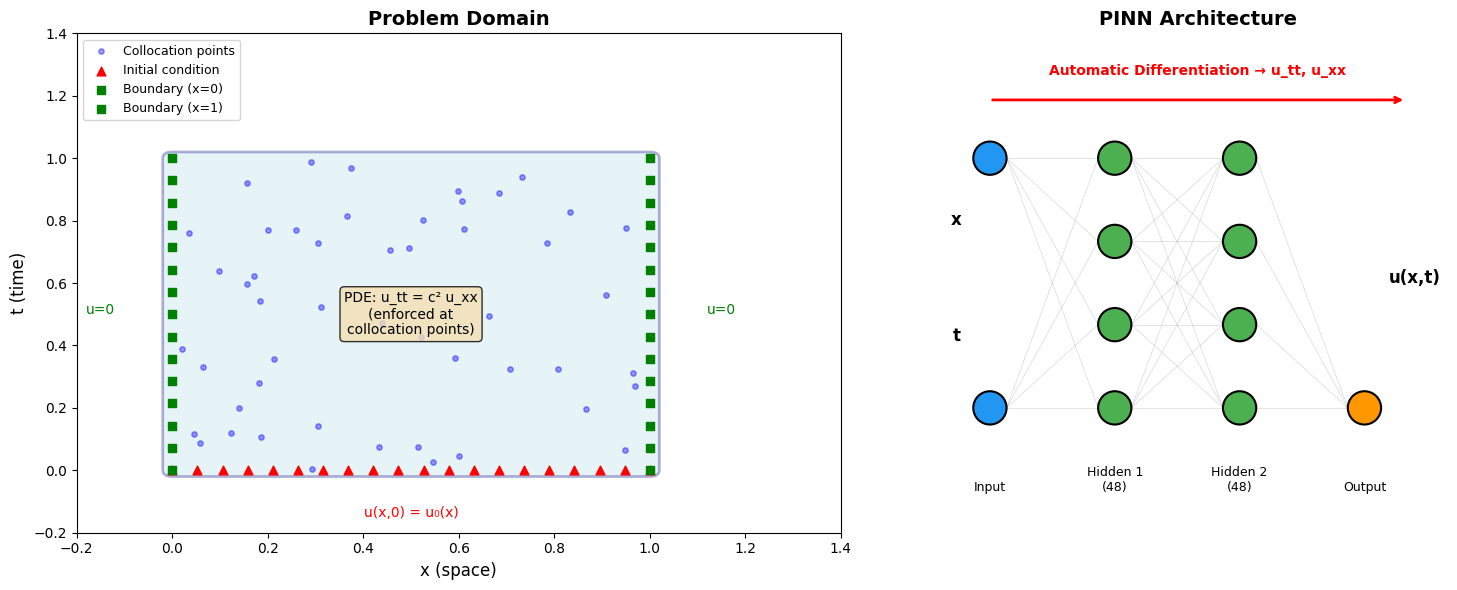

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# --- Left: Domain with boundary and initial conditions ---
ax = axes[0]
ax.set_xlim(-0.2, 1.4)
ax.set_ylim(-0.2, 1.4)

# Domain rectangle
domain = mpatches.FancyBboxPatch(
    (0, 0), 1, 1, boxstyle="round,pad=0.02",
    facecolor='lightblue', edgecolor='navy', linewidth=2, alpha=0.3
)
ax.add_patch(domain)

# Collocation points
np.random.seed(42)
x_col = np.random.rand(50)
t_col = np.random.rand(50)
ax.scatter(x_col, t_col, c='blue', s=15, alpha=0.4, label='Collocation points')

# Initial condition (bottom edge)
x_ic = np.linspace(0, 1, 20)
ax.scatter(x_ic, np.zeros_like(x_ic), c='red', s=40, marker='^', label='Initial condition')

# Boundary conditions (left and right edges)
t_bc = np.linspace(0, 1, 15)
ax.scatter(np.zeros_like(t_bc), t_bc, c='green', s=40, marker='s', label='Boundary (x=0)')
ax.scatter(np.ones_like(t_bc), t_bc, c='green', s=40, marker='s', label='Boundary (x=1)')

ax.set_xlabel('x (space)', fontsize=12)
ax.set_ylabel('t (time)', fontsize=12)
ax.set_title('Problem Domain', fontsize=14, fontweight='bold')
ax.legend(loc='upper left', fontsize=9)

# Annotations
ax.annotate('u(x,0) = u₀(x)', xy=(0.5, 0), xytext=(0.5, -0.15),
           fontsize=10, ha='center', color='red')
ax.annotate('u=0', xy=(0, 0.5), xytext=(-0.15, 0.5),
           fontsize=10, ha='center', color='green')
ax.annotate('u=0', xy=(1, 0.5), xytext=(1.15, 0.5),
           fontsize=10, ha='center', color='green')
ax.text(0.5, 0.5, 'PDE: u_tt = c² u_xx\n(enforced at\ncollocation points)',
       fontsize=10, ha='center', va='center',
       bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

# --- Right: Neural Network Architecture ---
ax = axes[1]
ax.set_xlim(-0.5, 5.5)
ax.set_ylim(-1, 5)
ax.set_aspect('equal')
ax.axis('off')
ax.set_title('PINN Architecture', fontsize=14, fontweight='bold')

# Layer positions
layer_x = [0, 1.5, 3.0, 4.5]
layer_sizes = [2, 4, 4, 1]  # Visual representation
layer_labels = ['Input', 'Hidden 1\n(48)', 'Hidden 2\n(48)', 'Output']
colors = ['#2196F3', '#4CAF50', '#4CAF50', '#FF9800']

# Draw neurons and connections
neuron_positions = []
for i, (x_pos, n_neurons) in enumerate(zip(layer_x, layer_sizes)):
    y_positions = np.linspace(0.5, 3.5, n_neurons)
    positions = [(x_pos, y) for y in y_positions]
    neuron_positions.append(positions)
    
    for (x, y) in positions:
        circle = plt.Circle((x, y), 0.2, color=colors[i], ec='black', linewidth=1.5, zorder=3)
        ax.add_patch(circle)
    
    ax.text(x_pos, -0.5, layer_labels[i], ha='center', fontsize=9)

# Draw connections
for i in range(len(layer_x) - 1):
    for (x1, y1) in neuron_positions[i]:
        for (x2, y2) in neuron_positions[i + 1]:
            ax.plot([x1 + 0.2, x2 - 0.2], [y1, y2],
                   'gray', linewidth=0.5, alpha=0.3, zorder=1)

# Input/Output labels
ax.text(-0.4, 2.7, 'x', fontsize=12, fontweight='bold', ha='center')
ax.text(-0.4, 1.3, 't', fontsize=12, fontweight='bold', ha='center')
ax.text(5.1, 2.0, 'u(x,t)', fontsize=12, fontweight='bold', ha='center')

# Autograd arrow
ax.annotate('', xy=(5.0, 4.2), xytext=(0, 4.2),
           arrowprops=dict(arrowstyle='->', color='red', lw=2))
ax.text(2.5, 4.5, 'Automatic Differentiation → u_tt, u_xx', fontsize=10,
       ha='center', color='red', fontweight='bold')

plt.tight_layout()
plt.savefig('../results/theory_diagram.png', dpi=150, bbox_inches='tight')
plt.show()